# Fonis Datageeks
## Wokshop: Exploratory Data Analysis
### Domaći zadatak 2: Ad-hoc analiza kupovina tokom Black Fridaya
***

**Dodati code cellove sa rešenjem nakon svakog zadatka.**

***

1. Učitati dataset BlackFriday. Nalazi se na [našem drajvu](https://drive.google.com/open?id=1e7U_goISvsagQP1Rwqllu15MjSmc-0cP). Radi se o datasetu o kupovinama koje su se obavile u prodavnici za vreme Black Fridaya. Više informacija o datasetu možete naći na [Kaggle-u](https://www.kaggle.com/mehdidag/black-friday).

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head(8)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854


***

2. Koliko procenata kupaca je mlađe od 30 godina?

In [10]:
young_categories = ['0-17', '18-25', '26-35']
showYounger30  = df[df['Age'].isin(young_categories)].shape[0] / float(df.shape[0])
print(showYounger30, '%')

0.6083426188248381 %


***

3. Koliko prosečno novca na kupovinu potroše muškarci a koliko žene?

In [5]:
df.groupby(['Gender'])['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

***

4. Ukratko opisati koliko često kupuju i koliko novca troše na kupovinu klijenti različite starosti i različitog pola.

In [11]:
freq_purchase = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
df.groupby('Age')[freq_purchase].agg(['count', 'min', 'max', 'mean']).round(2)

Product_Category_1               Product_Category_2                    \
                   count min max  mean              count  min   max   mean   
Age                                                                           
0-17               14707   1  18  4.94              10466  2.0  18.0   9.02   
18-25              97634   1  18  5.00              68256  2.0  18.0   9.47   
26-35             214690   1  18  5.22             147745  2.0  18.0   9.81   
36-45             107499   1  18  5.39              74169  2.0  18.0   9.95   
46-50              44526   1  18  5.63              30441  2.0  18.0  10.18   
51-55              37618   1  18  5.65              25652  2.0  18.0  10.28   
55+                20903   1  18  5.90              13862  2.0  18.0  10.46   

      Product_Category_3                   Purchase                       
                   count  min   max   mean    count  min    max     mean  
Age                                                                       
0-17                4789  3.0  18.0  11.85    14707  187  23955  9020.13  
18-25              30889  3.0  18.0  12.40    97634  185  23958  9235.20  
26-35              65916  3.0  18.0  12.65   214690  185  23961  9314.59  
36-45              32758  3.0  18.0  12.75   107499  185  23960  9401.48  
46-50              13135  3.0  18.0  12.94    44526  186  23960  9284.87  
51-55              11018  3.0  18.0  13.11    37618  187  23960  9620.62  
55+                 5773  3.0  18.0  13.15    20903  187  23960  9453.90

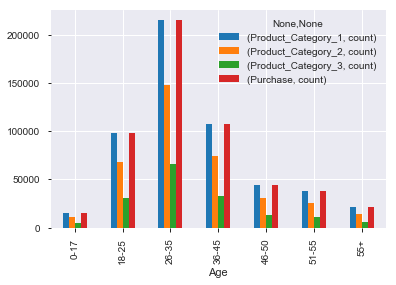

In [19]:
df.groupby('Age')[freq_purchase].agg(['count']).round(2).plot(kind='bar')

Najviše kupuju ljudi između 26 i 35 godina, zatim ljudi do 45 godina života i mladi od 18 do 25 godina. 

In [18]:
df.groupby('Gender')[freq_purchase].agg(['count', 'min', 'max', 'mean']).round(2)

Product_Category_1              Product_Category_2                    \
                    count min max mean              count  min   max   mean   
Gender                                                                        
F                  132197   1  18  5.6              89850  2.0  18.0  10.01   
M                  405380   1  18  5.2             280741  2.0  18.0   9.79   

       Product_Category_3                   Purchase                       
                    count  min   max   mean    count  min    max     mean  
Gender                                                                     
F                   36932  3.0  18.0  12.45   132197  185  23959  8809.76  
M                  127346  3.0  18.0  12.73   405380  185  23961  9504.77

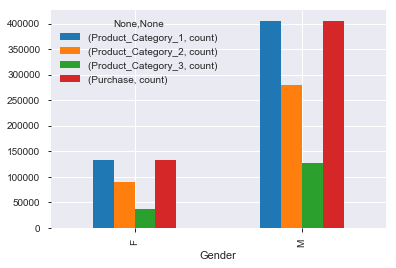

In [21]:
df.groupby('Gender')[freq_purchase].agg(['count']).round(2).plot(kind='bar')

Najviše se kupuje iz prve kategorije i toliko da druge i treća kategorija zajedno imaju isto kao i prva što važi za oba pola.

In [4]:
df.pivot_table(['Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase'],
               ['Age', 'Gender'] ).round(1)

Product_Category_1  Product_Category_2  Product_Category_3  \
Age   Gender                                                               
0-17  F                      5.2                 8.7                11.3   
      M                      4.8                 9.2                12.1   
18-25 F                      5.4                 9.6                12.1   
      M                      4.9                 9.4                12.5   
26-35 F                      5.6                10.1                12.5   
      M                      5.1                 9.7                12.7   
36-45 F                      5.6                10.0                12.5   
      M                      5.3                 9.9                12.8   
46-50 F                      5.8                10.3                12.9   
      M                      5.6                10.1                13.0   
51-55 F                      5.9                10.4                12.8   
      M                      5.6                10.2                13.2   
55+   F                      6.2                10.8                13.1   
      M                      5.8                10.4                13.2   

              Purchase  
Age   Gender            
0-17  F         8444.7  
      M         9312.3  
18-25 F         8405.4  
      M         9506.5  
26-35 F         8791.8  
      M         9470.6  
36-45 F         9046.6  
      M         9517.1  
46-50 F         8929.4  
      M         9429.2  
51-55 F         9131.5  
      M         9789.0  
55+   F         9119.6  
      M         9557.1

Vidimo da najviše troše muškarci iz svih starosnih grupa. 

***

5. Vizualizovati i napisati zaključak o tome kako je raspoređena visina računa (Da li najviše ima računa sa malim/srednjim/visokim iznosima ili je jednako verovatno da se pojavi bilo koji iznos? Kakvih outlier ima više? Kojom biste merom najbolje opisali prosečan iznos računa? Da li taj iznos malo ili mnogo varira? (i slično)

In [25]:
purchase = df['Purchase']
print(purchase.describe())

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64


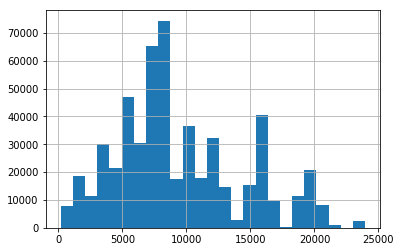

In [26]:
df['Purchase'].hist(bins=25)

Prosečna visina računa je 9330 i najviše ima računa sa visokim iznosima u visini prosečnih i malo ispod prosečnih vrednosti. 

***

6. Vizualizovati frekvenciju pojavljivanja svake od kategorija u kategoričkim atributima Starost, Zanimanje i Godine života u trenutnom gradu. Da li kupci ove radnje dolaze iz svih grupa podjednako? Prokomentarisati. `Napomena` Occupation atribut je maskiran, što znači da se odnosi na zanimanje ali umesto naziva zanimanja, zbog privatnosti je odlučeno da se vide samo šifre 0,1,2... (plaky)-


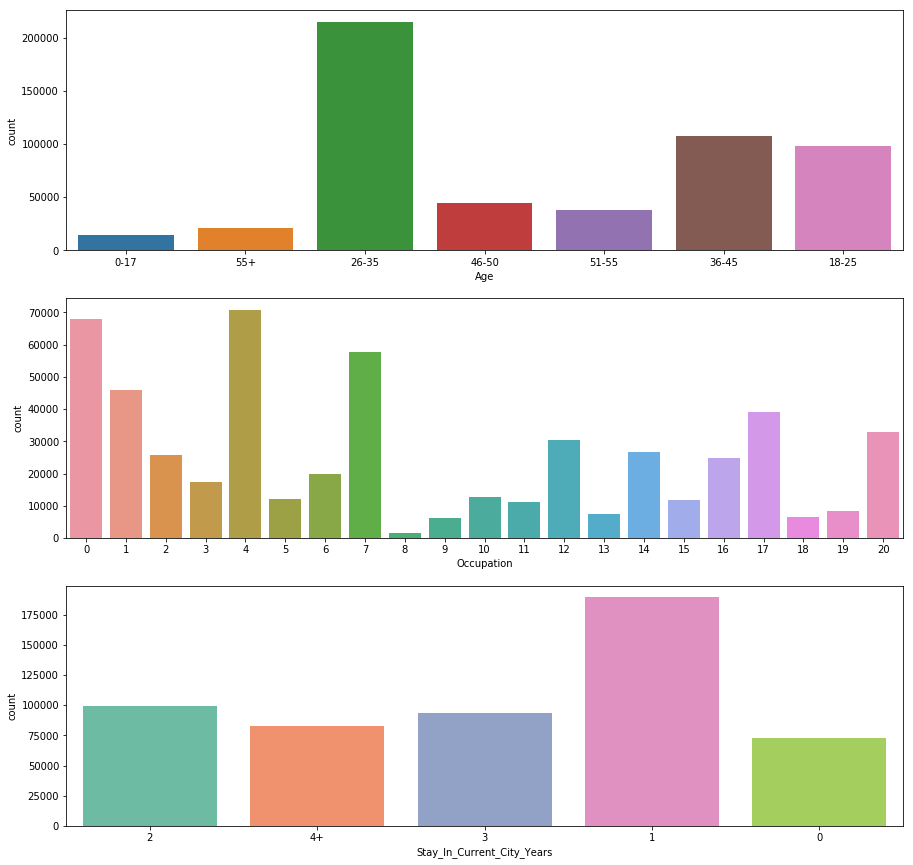

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.countplot(x='Age', data=df, saturation=0.75, dodge=True, ax=axes[0])
sns.countplot(x='Occupation', data=df, palette=None, saturation=0.75, dodge=True, ax=axes[1])
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='Set2', saturation=0.85, ax=axes[2])

Kupci ove radnje su najčešće između 26 i 35 godina starosti, kojima je ovo prva godina u gradu ( dok su ostali ravnomerno raspoređeni što se tiče vremena provedenog u ovom gradu ). Ima ih raznih zanimanja, ali su najfrekventnije grupe nulta, četvrta i sedma grupa. 

***

7. Da li visina računa zavisi od bračnog statusa? Vizualizovati. 

In [30]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,317817.0,9333.325467,4985.253932,185.0,5850.0,8059.0,12080.0,23961.0
1,219760.0,9334.632681,4974.906972,186.0,5886.0,8066.0,12065.0,23961.0


C:\Users\Marko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


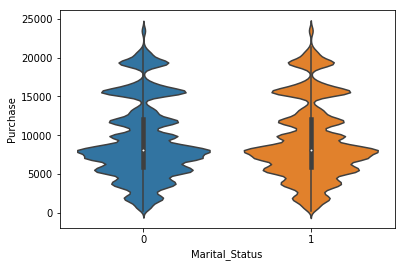

In [31]:
sns.violinplot(x='Marital_Status', y='Purchase', data=df)

Visina računa ne zavisi od bračnog statusa.

***

8. Zabave radi, na osnovu svega ovoga, da li bi mogao/la da pretpostaviš šta prodaje ova kompanija?

Ova kompanija se bavi hortikulturom ( uzgojem i prodajom biljaka )

***